In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [4]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1833.000000,616.000000,1836.000000
mean,1.735294,1.695035,1021.472403,2016.338235
std,0.774721,0.550915,413.481218,799.370174
min,0.000000,1.000000,235.000000,500.000000
25%,1.000000,1.000000,741.500000,1500.000000
50%,2.000000,2.000000,950.000000,1800.000000
75%,2.000000,2.000000,1250.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


In [5]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
miami_df.loc[miami_df['sqft'].str.contains('nan'), 'sqft'] = "0"
miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])

# replace NaN in miami_df['ba']
miami_df['ba'] = miami_df['ba'].apply(str)
miami_df.loc[miami_df['ba'].str.contains('nan'), 'ba'] = "0"
miami_df['ba'] = pd.to_numeric(miami_df['ba'])
miami_df

miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  1836 non-null   object 
 1   br            1836 non-null   int64  
 2   ba            1836 non-null   float64
 3   sqft          1836 non-null   float64
 4   housingType   1836 non-null   object 
 5   laundry       1836 non-null   object 
 6   parking       1836 non-null   object 
 7   cats          1836 non-null   object 
 8   dogs          1836 non-null   object 
 9   furnished     1836 non-null   object 
 10  rent          1836 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 157.9+ KB


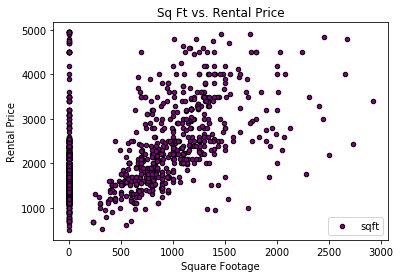

In [6]:
plt.figure()
plt.scatter(miami_df['sqft'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="sqft")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("Sq Ft vs. Rental Price")
plt.legend()
plt.show()

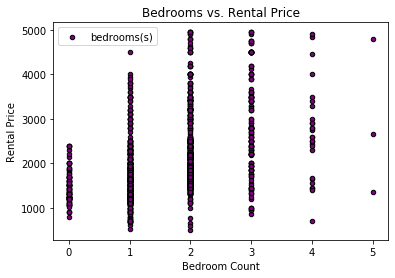

In [7]:
plt.figure()
plt.scatter(miami_df['br'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="bedrooms(s)")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("Bedrooms vs. Rental Price")
plt.legend()
plt.show()

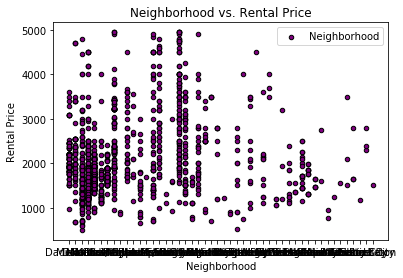

In [8]:
plt.figure()
plt.scatter(miami_df['neighborhood'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("Neighborhood vs. Rental Price")
plt.legend()
plt.show()

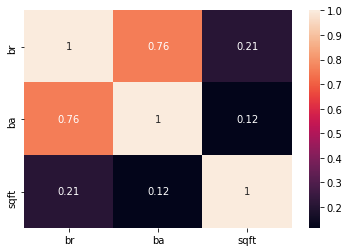

In [9]:
import seaborn as sn
## keep only numerical columns
X = (miami_df[["br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished"]])
## correlation matrix
corrMatrix = X.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Data Preprocessing

In [10]:
X = pd.get_dummies(miami_df[["neighborhood", "br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished"]])
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
X

(1836, 69) (1836, 1)


,br,ba,sqft,neighborhood_Allapattah,neighborhood_Aventura,neighborhood_Beverly Terrace,neighborhood_Boca Raton,neighborhood_Brickell,neighborhood_Brownsville,neighborhood_Coconut Grove,...,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,cats_no,cats_yes,dogs_no,dogs_yes,furnished_no,furnished_yes
0,2,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,2,2.0,1106.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,3,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1832,2,2.0,1300.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1833,2,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1834,2,2.5,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)
# Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)

## Deep Learning Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Neural Network model here

deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=69))
# deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [13]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile and fit the model

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100


ValueError: in user code:

    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 20 but received input with shape (None, 69)


In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_scaled, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

## Make Predictions

In [ ]:
# Use the first 5 test data values to make a prediction and compare it to the actual labels

encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
# inverse transform takes the 0 or 1 and puts it back to the original format Male and Female

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")